In [2]:
#Import the basic libraries
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
                

In [53]:
# Dummy Testing to check Twitter API connection
import tweepy
consumer_key = ''
consumer_secret = 'x'

access_token = '2S'
access_secret = ''


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser())

tweet = api.get_status(892420643555336193, tweet_mode='extended')
tweet.keys()
#print(tweet)
#print(tweet)
#print(json.dumps(tweet, indent = 4))
#tweet.keys()
#tweet['retweet_count']

# Save the dataFrame in file
#tweet.to_csv('tweet_json.txt',index=False)

#print(tweet.text)
#print(json.dumps(tweet, indent = 4))

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [3]:

# Read the twitter file
Twitter_file1 = pd.read_csv('twitter-archive-enhanced.csv')
Twitter_file1


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [4]:
# Print file structure
#print(Twitter_file1.head(10))
print(Twitter_file1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Thus we have gathered data from twitter-archive-enhanced.csv file into Twitter_file1 dataframe. There are  2356 rows with 17 columns.

In [5]:
# Access website to fetch the file 2
website = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(website)

with open(website.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the file to dataframe
Twitter_file2 = pd.read_csv('image-predictions.tsv', sep = '\t')
Twitter_file2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [6]:
Twitter_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Thus we have gathered data from URL  image-predictions TSV file into Twitter_file2 dataframe. There are  2075 rows with 12 columns.

In [5]:
## To invoke the twitter API and create a file which will contain twitter id, retweet_count and  favorite_count

consumer_key = '4'
consumer_secret = 'x'
access_token = 'sS'
access_secret = 'Hh'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit = True,wait_on_rate_limit_notify = True)
df_file3a = []

# Get the tweet object for all the teweets in archive dataframe 
for tweet_id in Twitter_file1['tweet_id']:
    try: 
            twitter_content = api.get_status(tweet_id, tweet_mode = 'extended')
            favorites = twitter_content ['favorite_count']
            retweets = twitter_content['retweet_count']
              
            df_file3a.append({'tweet_id': int(tweet_id),
                             'favorites_count': int(favorites),
                            'retweets_count': int(retweets)
                             })
    except Exception as e:
               print(str(tweet_id)+ " _ " + str(e))
               df_file3a.append({'tweet_id'  : int(tweet_id),
                               'favorites_count' : "Not Found",
                               'retweets_count'  : "Not Found" })
  

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 724
Rate limit reached. Sleeping for: 724


In [6]:
#Dictionary to Dataframe
df_file3 = pd.DataFrame(df_file3a, columns = ['tweet_id', 'favorites_count', 'retweets_count'])
# Save the dataFrame in file
df_file3.to_csv('tweet_json.txt',index=False)

In [7]:
# Read the saved tweet_json file into Twitter_file3 dataframe
Twitter_file3 = pd.read_csv('tweet_json.txt')
Twitter_file3

,tweet_id,favorites_count,retweets_count
0,892420643555336193,38950,8631
1,892177421306343426,33346,6341
2,891815181378084864,25122,4208
3,891689557279858688,42287,8756
4,891327558926688256,40452,9513
5,891087950875897856,20291,3149
6,890971913173991426,11899,2100
7,890729181411237888,65798,19138
8,890609185150312448,27868,4317
9,890240255349198849,32053,7513


In [8]:
Twitter_file3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id           2356 non-null int64
favorites_count    2356 non-null object
retweets_count     2356 non-null object
dtypes: int64(1), object(2)
memory usage: 55.3+ KB


#### Thus we have gathered the Favourites and retweets count for the given twitter_id using the API call and stored the data into csv file. There are  2356 rows with 3 columns.

#### Gathering process - Summary.
#### At the completion of this process, we have gathered the data from three sources and  stored the same into three data frames.

#### Assess process
#### 1. Visual assessment
#### 2. Program assessment
#### By which quality issues and Tidyness issues will be identified

In [9]:
Twitter_file1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Visual Assessment-  By looking the above data Visually via dataframe as well as excel editor
1. Invalid value in numerator (Very high value like 1770) and denominator (Has value zero) - quality issue
2. Column Name has values like 'a','None' -which are invalid values - quality issue
3. There are some retweeted records which need to be removed from the dataset - quality issue
4. For a given Tweet_id , we can see that columns doggo as well as pupper are having values - Example consider the tweet about the dog name called  Maggie, it has got value doggo as well as pupper, for the same dog multiple dog stage value has been assigned - this is quality issue
5. columns doggo,pupper,floofer,puppo are untidy columns - where we can replace them with single column called "Dog_Type"   - Tidy issue


In [10]:
#programmatic Assessment
Twitter_file1.info()
Twitter_file1.describe()
# Validate if there are duplicate Tweet_id
Twitter_file1[Twitter_file1.duplicated(subset = 'tweet_id' )]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Observations are File1 - Twitter_file1 Dataframe listed below
1. in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id ,retweeted_status_user_id  seem to have  float datatype - quality issue.  
2. retweeted_status_timestamp, timestamp should be datetime instead of object  quality issue  
3. There are 181 records which has values for the column retweeted_status_id, from which we can infer that these records will be the retweeted records and not the original tweets. For our project , we can remove these records - Quality issue

In [11]:
#Visual assessment - dataset 2 image 
Twitter_file2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


#### Based on Visual assessment, we can observe
1. All the columns in image - Twitter_File2 dataframe are not necessary - Twitter_id and jpg_url 
 are enough - Tidyness issue
2. There are only 2075 rows, which clearly explains missing entries (Ideally there should have been 2356 entries)- quality issue  
3. To predict the dog_breed, we see there are three predictions, also if prediction is true/false and the confidence level as well. This seems untidy data and can be replaced with two columns - Dog_breed and confidence level. From the three given predictions, we can take the very first true prediction. 

In [12]:
#programmatic Assessment
Twitter_file2.info()
Twitter_file2.describe()
# Validate if there are duplicate Tweet_id
Twitter_file2[Twitter_file2.duplicated(subset = 'tweet_id' )]
Twitter_file2[Twitter_file2.duplicated(subset = 'jpg_url' )]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


#### Based on above programmatic assessment,
1. There are duplicate entries based on image URL - quality issue

In [13]:
#Visual assessment 
Twitter_file3

,tweet_id,favorites_count,retweets_count
0,892420643555336193,38950,8631
1,892177421306343426,33346,6341
2,891815181378084864,25122,4208
3,891689557279858688,42287,8756
4,891327558926688256,40452,9513
5,891087950875897856,20291,3149
6,890971913173991426,11899,2100
7,890729181411237888,65798,19138
8,890609185150312448,27868,4317
9,890240255349198849,32053,7513


#### Observations given below
1. For few tweet_id, we could not fetch the favourite and retweets count - quality issue



In [14]:
#programmatic Assessment
Twitter_file3.info()
# Validate number of entries with not found values
print(Twitter_file3[Twitter_file3['retweets_count'] == "Not Found"])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id           2356 non-null int64
favorites_count    2356 non-null object
retweets_count     2356 non-null object
dtypes: int64(1), object(2)
memory usage: 55.3+ KB
               tweet_id favorites_count retweets_count
19   888202515573088257       Not Found      Not Found
95   873697596434513921       Not Found      Not Found
118  869988702071779329       Not Found      Not Found
132  866816280283807744       Not Found      Not Found
155  861769973181624320       Not Found      Not Found
247  845459076796616705       Not Found      Not Found
260  842892208864923648       Not Found      Not Found
298  837012587749474308       Not Found      Not Found
382  827228250799742977       Not Found      Not Found
566  802247111496568832       Not Found      Not Found
784  775096608509886464       Not Found      Not Found


###  Summary of Assessment process
#### Quality issue
1. Invalid value in numerator (Very high value like 1770) and denominator (Has value zero) - quality issue  
2. Column Name has values like 'a','None' -which are invalid values - quality issue  
3. There are some retweeted records which need to be removed from the dataset - quality issue  
4. For a given Tweet_id , we can see that columns doggo as well as pupper are having values - Example consider the tweet about the dog name called  Maggie, it has got value doggo as well as pupper, for the same dog multiple dog stage value has been assigned - this is quality issue    
5. in_reply_to_status_id ,in_reply_to_user_id ,retweeted_status_id ,retweeted_status_user_id seem to have float datatype - quality issue.  
6. retweeted_status_timestamp, timestamp should be datetime instead of object quality issue  
7. There are 181 records which has values for the column retweeted_status_id, from which we can infer that these records will be the retweeted records and not the original tweets. For our project , we can remove these records - Quality issue  
8. There are only 2075 rows in the image predictions file , which clearly explains missing entries (Ideally there should have been 2356 entries)- quality issue
9.  There are duplicate entries based on image URL in the image predictions file - quality issue  
10. For few tweet_id, we could not fetch the favourite and retweets count in the file 3 - Twitter API file data- quality issue

#### Tidyness issue
1.  columns doggo,pupper,floofer,puppo are untidy columns - where we can replace them with single column called "Dog_stage"   - Tidy issue
2. All the columns in image - Twitter_File2 dataframe are not necessary - columns Twitter_id , jpg_url, Dog_breed  are enough - Tidyness issue
3. Three files  could be consolidated into single file 



In [15]:
## To Take a copy of the Twitter_File1 and  remove the retweet records.- Define the clean process

#Code to copy and clean the file 1
Twitter_file1_clean = Twitter_file1.copy()
Twitter_file1_clean = Twitter_file1_clean[Twitter_file1_clean['retweeted_status_id'].isnull()]

## Validate the clean process
print(Twitter_file1_clean['retweeted_status_id'].notnull().value_counts())

# To change the timestamp field datatypes from string to Datetime - Define the clean process

#Code
Twitter_file1_clean['timestamp'] = pd.to_datetime(Twitter_file1_clean['timestamp'])
# Validate the clean process

# validate the clean process
#print(Twitter_file1_clean.info())

# To drop the retweeted column values - since they are not necessary - Define process 

#Code process

Twitter_file1_clean = Twitter_file1_clean.drop('retweeted_status_id', 1)
Twitter_file1_clean = Twitter_file1_clean.drop('retweeted_status_user_id', 1)
Twitter_file1_clean = Twitter_file1_clean.drop('retweeted_status_timestamp', 1)

# Validate the clean process
print(Twitter_file1_clean.info())


False    2175
Name: retweeted_status_id, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB
None


In [16]:
# To fetch the value_counts based on columns doggo,pupper,floofer,puppo untidy columns

print(Twitter_file1_clean['doggo'].value_counts())
print(Twitter_file1_clean['floofer'].value_counts())
print(Twitter_file1_clean['pupper'].value_counts())
print(Twitter_file1_clean['puppo'].value_counts())

None     2088
doggo      87
Name: doggo, dtype: int64
None       2165
floofer      10
Name: floofer, dtype: int64
None      1941
pupper     234
Name: pupper, dtype: int64
None     2150
puppo      25
Name: puppo, dtype: int64


In [17]:
## Define process
## To melt the columns - columns doggo,pupper,floofer,puppo are untidy columns and reduce them to single column called
# dog_stage_value . Also in this process, we fix the quality issue where the given dog is mapped to two values Doggo, Pupper by sorting the 
## data and then retaining the last record (Ascending order)

# Code process
# Select the columns to melt 
melt = ['doggo', 'floofer', 'pupper', 'puppo']
retain = list(Twitter_file1_clean)
retain = retain[:-4]

Twitter_file1_clean = pd.melt(Twitter_file1_clean, id_vars = retain, value_vars = melt,var_name='dog_stage', value_name='dog_stage_value')

# Delete column dog_stage since it is sufficient to have only the dog_stage_value column

Twitter_file1_clean = Twitter_file1_clean.drop('dog_stage', 1)

Twitter_file1_clean['dog_stage_value'] = Twitter_file1_clean['dog_stage_value'].replace(["None"], ["aaaa"])

Twitter_file1_clean = Twitter_file1_clean.sort_values(by=['dog_stage_value'])

Twitter_file1_clean = Twitter_file1_clean.drop_duplicates('tweet_id', keep = 'last')

Twitter_file1_clean['dog_stage_value'] = Twitter_file1_clean['dog_stage_value'].replace(["aaaa"], ["None"])

# Validate the final data
Twitter_file1_clean



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage_value
2095,667443425659232256,NaN,NaN,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,None
2094,667453023279554560,NaN,NaN,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,None
2093,667455448082227200,NaN,NaN,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,10,Reese,None
2092,667470559035432960,NaN,NaN,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,10,a,None
2091,667491009379606528,NaN,NaN,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,10,None,None
2090,667495797102141441,NaN,NaN,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,9,10,Philippe,None
2089,667502640335572993,NaN,NaN,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None
2088,667509364010450944,NaN,NaN,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,None,None
2087,667517642048163840,NaN,NaN,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None
2086,667524857454854144,NaN,NaN,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,12,10,None,None


In [18]:
Twitter_file1_clean['dog_stage_value'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage_value, dtype: int64

In [21]:
## To view the file2 structure
Twitter_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
### To drop unwanted columns from the image file and have only the tweet id , URL columns, Dog_Breed and confidence level in the dataframe
#Code
Twitter_file2_clean = Twitter_file2.copy()

#Twitter_file2_clean
# Store the first true Dog_Breed and confidence level
Dog_Breed = []
Confidence = []

locs = 0
for names1,names2,names3 in zip(Twitter_file2_clean['p1_dog'],Twitter_file2_clean['p2_dog'],Twitter_file2_clean['p3_dog']):
    
    if  names1 == True:
        Dog_Breed.append(Twitter_file2_clean['p1'][locs])
        Confidence.append(Twitter_file2_clean['p1_conf'][locs])
    elif names2 == True:
        Dog_Breed.append(Twitter_file2_clean['p2'][locs])
        Confidence.append(Twitter_file2_clean['p2_conf'][locs])
    elif names3 == True:
        Dog_Breed.append(Twitter_file2_clean['p3'][locs])
        Confidence.append(Twitter_file2_clean['p3_conf'][locs])
    else:
        Dog_Breed.append('NaN')
        Confidence.append(0)
    locs = locs + 1

#Dog_Breed
        
Twitter_file2_clean['Dog_breed_prediction']        =  Dog_Breed
Twitter_file2_clean['prediction_confidence_level'] =  Confidence

#Validate the data
Twitter_file2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id                       2075 non-null int64
jpg_url                        2075 non-null object
img_num                        2075 non-null int64
p1                             2075 non-null object
p1_conf                        2075 non-null float64
p1_dog                         2075 non-null bool
p2                             2075 non-null object
p2_conf                        2075 non-null float64
p2_dog                         2075 non-null bool
p3                             2075 non-null object
p3_conf                        2075 non-null float64
p3_dog                         2075 non-null bool
Dog_breed_prediction           2075 non-null object
prediction_confidence_level    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


In [23]:
# To drop the unwanted columns from the image predictions file 
Twitter_file2_clean = Twitter_file2_clean.drop('p1', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p2', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p3', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p1_dog', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p2_dog', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p3_dog', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p1_conf', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p2_conf', 1)
Twitter_file2_clean = Twitter_file2_clean.drop('p3_conf', 1)

In [24]:
# Validate the final image predictions file 
Twitter_file2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id                       2075 non-null int64
jpg_url                        2075 non-null object
img_num                        2075 non-null int64
Dog_breed_prediction           2075 non-null object
prediction_confidence_level    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


In [26]:
### To remove the not found rows in the Twitter_File3_data - Define the clean process

#Code
Twitter_file3_clean = Twitter_file3.copy()
Twitter_file3_clean  = Twitter_file3_clean[Twitter_file3_clean['favorites_count'] != "Not Found"]

#Validate the data
Twitter_file3_clean

,tweet_id,favorites_count,retweets_count
0,892420643555336193,38950,8631
1,892177421306343426,33346,6341
2,891815181378084864,25122,4208
3,891689557279858688,42287,8756
4,891327558926688256,40452,9513
5,891087950875897856,20291,3149
6,890971913173991426,11899,2100
7,890729181411237888,65798,19138
8,890609185150312448,27868,4317
9,890240255349198849,32053,7513


In [27]:
### To merge all the three files into single  file
df_merge_file = pd.merge(Twitter_file1_clean, Twitter_file2_clean, how = 'inner', on = ['tweet_id'] )
df_merge_file = pd.merge(df_merge_file, Twitter_file3_clean, how = 'inner', on = ['tweet_id'])
df_merge_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                       1994 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1994 non-null datetime64[ns]
source                         1994 non-null object
text                           1994 non-null object
expanded_urls                  1994 non-null object
rating_numerator               1994 non-null int64
rating_denominator             1994 non-null int64
name                           1994 non-null object
dog_stage_value                1994 non-null object
jpg_url                        1994 non-null object
img_num                        1994 non-null int64
Dog_breed_prediction           1994 non-null object
prediction_confidence_level    1994 non-null float64
favorites_count                1994 non-null object
retweets_count                 1994 non-null object
dtypes

In [28]:
## Validate the master data if there are any duplicate records based on image URL - Assess master dataset
df_merge_file[df_merge_file.duplicated(subset = 'jpg_url' )]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage_value,jpg_url,img_num,Dog_breed_prediction,prediction_confidence_level,favorites_count,retweets_count


In [29]:
df_merge_file['favorites_count'] = df_merge_file['favorites_count'].astype(int)
df_merge_file['retweets_count']  = df_merge_file['retweets_count'].astype(int)
df_merge_file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                       1994 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1994 non-null datetime64[ns]
source                         1994 non-null object
text                           1994 non-null object
expanded_urls                  1994 non-null object
rating_numerator               1994 non-null int64
rating_denominator             1994 non-null int64
name                           1994 non-null object
dog_stage_value                1994 non-null object
jpg_url                        1994 non-null object
img_num                        1994 non-null int64
Dog_breed_prediction           1994 non-null object
prediction_confidence_level    1994 non-null float64
favorites_count                1994 non-null int64
retweets_count                 1994 non-null int64
dtypes: 

#### Now from the merged dataset, Dog name and Dog Rating fields will be assessed and corrected

In [30]:
## To Assess the Dog name and dog text columns
#print(df_merge_file['name'])
df_merge_file['text']

0       Exotic dog here. Long neck. Weird paws. Obsess...
1       Meet Cupcake. I would do unspeakable things fo...
2       This is Reese and Twips. Reese protects Twips....
3       This is a northern Wahoo named Kohl. He runs t...
4       Two dogs in this one. Both are rare Jujitsu Py...
5       This is Philippe from Soviet Russia. Commandin...
6       Say hello to Hall and Oates. Oates is winking ...
7       This a Norwegian Pewterschmidt named Tickles. ...
8       This is Dook &amp; Milo. Dook is struggling to...
9       Another topnotch dog. His name is Big Jumpy Ra...
10      Meet Naphaniel. He doesn't necessarily enjoy h...
11      This is Frank (pronounced "Fronq"). Too many b...
12      This is a southwest Coriander named Klint. Hat...
13      This is Kial. Kial is either wearing a cape, w...
14      Never seen this breed before. Very pointy pup....
15      Here is George. George took a selfie of his ne...
16      What a dog to start the day with. Very calm. L...
17      Meet O

#### Based on the above Assessment - name is present in the text within the phrases like
Meet Cupcake.  
This is Reese.  
Say hello to Pablo.  
Norwegian Pewterschmidt named Tickles.  
Here is George.  
name is  

### As part of this project motivation, we will derive the names of the dog from the above text phrases.

In [31]:
## Create a new column dog_text_name

dog_text_name_list = []

for text in df_merge_file['text']:
    # To parse the name from phrase 'This is'
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_text_name_list.append(text.split()[2].strip(',').strip('.'))
        
    # To parse the name from phrase 'Meet '
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_text_name_list.append(text.split()[1].strip(',').strip('.'))
    # To parse the name from phrase 'Say hello to '
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_text_name_list.append(text.split()[3].strip(',').strip('.'))
       # To parse the name from phrase 'named '
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_text_name_list.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    else:
        dog_text_name_list.append('NaN')
# Save the result 
df_merge_file['dog_text_name'] = dog_text_name_list


In [32]:
## Validate the derived columns
print("New column dog_name   count \n", df_merge_file['dog_text_name'].value_counts())
print("Existingcolumn name   count \n", df_merge_file['name'].value_counts())

New column dog_name   count 
 NaN          627
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
Winston        8
Daisy          7
Lola           7
Bo             6
Koda           6
Stanley        6
Toby           6
Bella          6
Jax            6
Oscar          5
Buddy          5
Milo           5
Chester        5
Louis          5
Rusty          5
Leo            5
Scout          5
Bailey         5
Reggie         4
Dave           4
Archie         4
Larry          4
            ... 
Blue           1
Chef           1
Skye           1
Leela          1
Rilo           1
Spork          1
Callie         1
Mason          1
Fynn           1
Blanket        1
Bruiser        1
Shiloh         1
Batdog         1
Petrick        1
Kara           1
Jangle         1
Bronte         1
Moreton        1
Monkey         1
Tupawc         1
Darby          1
Rizzy          1
Kyro           1
Cuddles        1
Alejandro      1
Lupe           1
L

In [33]:
## we will drop the existing name coulmn and retain the new derived name column.
df_merge_file = df_merge_file.drop('name', 1)

# Validate the data frame
df_merge_file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                       1994 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1994 non-null datetime64[ns]
source                         1994 non-null object
text                           1994 non-null object
expanded_urls                  1994 non-null object
rating_numerator               1994 non-null int64
rating_denominator             1994 non-null int64
dog_stage_value                1994 non-null object
jpg_url                        1994 non-null object
img_num                        1994 non-null int64
Dog_breed_prediction           1994 non-null object
prediction_confidence_level    1994 non-null float64
favorites_count                1994 non-null int64
retweets_count                 1994 non-null int64
dog_text_name                  1994 non-null object
dtypes: 

In [34]:
## To assess the ratings parameter values 
print(" Numerator values :\n", df_merge_file['rating_numerator'].describe())
print(" Denominator values :\n", df_merge_file['rating_denominator'].describe())

 Numerator values :
 count    1994.000000
mean       12.280843
std        41.497718
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64
 Denominator values :
 count    1994.000000
mean       10.532096
std         7.320710
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64


In [43]:
### Dummy Testing cells 
#Twitter_file3[Twitter_file3['tweet_id']==835246439529840640]


In [44]:
##len(re.findall(r'[0-9]{1,4}/[0-9]{1,4}',"this is 45/34.34/55"))
###"ghgjjgg/23344".split("/")

In [35]:
## To derive the ratings parameter value from the text file. In case of two ratings, only 
rating_numerator = []
rating_denominator = []
rating_list = []

for texts in df_merge_file['text']:
    rating_list = re.findall(r'[0-9]{1,4}/[0-9]{1,4}',texts)
    lenth_list = len(rating_list)
    if lenth_list == 0 :
        rating_numerator.append('Error')
        rating_denominator.append('Error')
    else:
        parsvalu = rating_list[lenth_list-1].split("/") 
        rating_numerator.append(parsvalu[0])
        rating_denominator.append(parsvalu[1])

        
df_merge_file['new_numerator_Rating']  =  rating_numerator
df_merge_file['new_denominator_Rating']  =  rating_denominator
print(df_merge_file['new_numerator_Rating'].value_counts())
print(df_merge_file['new_denominator_Rating'].value_counts())
#df_merge_file['new_denominator_Rating'].describe()

12      450
10      412
11      397
13      263
9       150
8        98
7        53
14       36
6        33
5        32
3        19
4        16
2        10
1         5
0         2
84        1
420       1
143       1
144       1
165       1
88        1
1776      1
45        1
121       1
26        1
80        1
204       1
60        1
44        1
24        1
75        1
27        1
99        1
Name: new_numerator_Rating, dtype: int64
10     1981
80        2
50        2
40        1
150       1
130       1
110       1
170       1
7         1
120       1
90        1
70        1
Name: new_denominator_Rating, dtype: int64


In [37]:
df_merge_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id                       1994 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1994 non-null datetime64[ns]
source                         1994 non-null object
text                           1994 non-null object
expanded_urls                  1994 non-null object
rating_numerator               1994 non-null int64
rating_denominator             1994 non-null int64
dog_stage_value                1994 non-null object
jpg_url                        1994 non-null object
img_num                        1994 non-null int64
Dog_breed_prediction           1994 non-null object
prediction_confidence_level    1994 non-null float64
favorites_count                1994 non-null int64
retweets_count                 1994 non-null int64
dog_text_name                  1994 non-null object
new_nume

In [38]:
df_merge_file['new_numerator_Rating']   =     df_merge_file['new_numerator_Rating'].astype(int)
df_merge_file['new_denominator_Rating'] =   df_merge_file['new_denominator_Rating'].astype(int)
## we will drop the existing name coulmn and retain the new derived name column.
df_merge_file = df_merge_file.drop('rating_numerator', 1)
df_merge_file = df_merge_file.drop('rating_denominator', 1)
# Validate the data frame
df_merge_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                       1994 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1994 non-null datetime64[ns]
source                         1994 non-null object
text                           1994 non-null object
expanded_urls                  1994 non-null object
dog_stage_value                1994 non-null object
jpg_url                        1994 non-null object
img_num                        1994 non-null int64
Dog_breed_prediction           1994 non-null object
prediction_confidence_level    1994 non-null float64
favorites_count                1994 non-null int64
retweets_count                 1994 non-null int64
dog_text_name                  1994 non-null object
new_numerator_Rating           1994 non-null int64
new_denominator_Rating         1994 non-null int64
dtypes: 

In [39]:
# To remove the records which have invalid numerator/denominator ratings

print(df_merge_file['new_numerator_Rating'].describe())
print(df_merge_file['new_denominator_Rating'].describe())
print(df_merge_file.info())



count    1994.000000
mean       12.258776
std        41.489917
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: new_numerator_Rating, dtype: float64
count    1994.000000
mean       10.510030
std         7.261522
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: new_denominator_Rating, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                       1994 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1994 non-null datetime64[ns]
source                         1994 non-null object
text                           1994 non-null object
expanded_urls                  1994 non-null object
dog_stage_value                1994 non-null object
jpg_url                        1994 non-null obj

In [40]:
## To remove the record, which has the  numerator Rating  value 1776 
df_merge_file = df_merge_file[df_merge_file['new_numerator_Rating'] != 1776]
# Validate the above code changes
print(df_merge_file['new_numerator_Rating'].describe())
print(df_merge_file['new_denominator_Rating'].describe())
print(df_merge_file.info())

count    1993.000000
mean       11.373808
std        12.643405
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       420.000000
Name: new_numerator_Rating, dtype: float64
count    1993.000000
mean       10.510286
std         7.263336
min         7.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: new_denominator_Rating, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 17 columns):
tweet_id                       1993 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1993 non-null datetime64[ns]
source                         1993 non-null object
text                           1993 non-null object
expanded_urls                  1993 non-null object
dog_stage_value                1993 non-null object
jpg_url                        1993 non-null obj

### Store , Analyze and Visualize data


In [41]:
# Store the clean DataFrame in a CSV file
df_merge_file.to_csv('twitter_archive_master.csv', index=False)

In [4]:
df_archive_master = pd.read_csv('twitter_archive_master.csv')
df_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
tweet_id                       1993 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1993 non-null object
source                         1993 non-null object
text                           1993 non-null object
expanded_urls                  1993 non-null object
dog_stage_value                1993 non-null object
jpg_url                        1993 non-null object
img_num                        1993 non-null int64
Dog_breed_prediction           1686 non-null object
prediction_confidence_level    1993 non-null float64
favorites_count                1993 non-null int64
retweets_count                 1993 non-null int64
dog_text_name                  1366 non-null object
new_numerator_Rating           1993 non-null int64
new_denominator_Rating         1993 non-null int64
dtypes: float64(

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [45]:
df_archive_master.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,dog_stage_value,jpg_url,img_num,Dog_breed_prediction,prediction_confidence_level,favorites_count,retweets_count,dog_text_name,new_numerator_Rating,new_denominator_Rating
0,667443425659232256,NaN,NaN,2015-11-19 20:44:47,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,None,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,1,NaN,0.000000,809,607,NaN,6,10
1,667453023279554560,NaN,NaN,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,320,93,Cupcake,11,10
2,667455448082227200,NaN,NaN,2015-11-19 21:32:34,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,None,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,1,Tibetan_terrier,0.676376,196,65,Reese,7,10
3,667470559035432960,NaN,NaN,2015-11-19 22:32:36,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,None,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,265,101,Kohl,11,10
4,667491009379606528,NaN,NaN,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,None,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,550,237,NaN,8,10
5,667495797102141441,NaN,NaN,2015-11-20 00:12:54,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Philippe from Soviet Russia. Commandin...,https://twitter.com/dog_rates/status/667495797...,None,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,547,288,Philippe,9,10
6,667502640335572993,NaN,NaN,2015-11-20 00:40:05,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,https://twitter.com/dog_rates/status/667502640...,None,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,1,Labrador_retriever,0.996709,550,228,Hall,11,10
7,667509364010450944,NaN,NaN,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,None,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,7009,2221,Tickles,12,10
8,667517642048163840,NaN,NaN,2015-11-20 01:39:42,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,https://twitter.com/dog_rates/status/667517642...,None,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,381,198,Dook,8,10
9,667524857454854144,NaN,NaN,2015-11-20 02:08:22,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,https://twitter.com/dog_rates/status/667524857...,None,https://pbs.twimg.com/media/CUOGUfJW4AA_eni.jpg,1,Chesapeake_Bay_retriever,0.088122,1754,1171,NaN,12,10


In [46]:
df_archive_master['Dog_breed_prediction'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          21
Siberian_husky                     20
Shih-Tzu                           20
beagle                             20
Rottweiler                         19
Maltese_dog                        19
Shetland_sheepdog                  19
kuvasz                             18
Lakeland_terrier                   18
Italian_grey

In [5]:
# Convert columns to their appropriate types and set the tweet_date as an index
df_archive_master['timestamp'] = pd.to_datetime(df_archive_master.timestamp)
df_archive_master['source'] = df_archive_master['source'].astype('category')
df_archive_master['dog_stage_value'] = df_archive_master['dog_stage_value'].astype('category')
df_archive_master.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 17 columns):
tweet_id                       1993 non-null int64
in_reply_to_status_id          23 non-null float64
in_reply_to_user_id            23 non-null float64
timestamp                      1993 non-null datetime64[ns]
source                         1993 non-null category
text                           1993 non-null object
expanded_urls                  1993 non-null object
dog_stage_value                1993 non-null category
jpg_url                        1993 non-null object
img_num                        1993 non-null int64
Dog_breed_prediction           1686 non-null object
prediction_confidence_level    1993 non-null float64
favorites_count                1993 non-null int64
retweets_count                 1993 non-null int64
dog_text_name                  1366 non-null object
new_numerator_Rating           1993 non-null int64
new_denominator_Rating         1993 non-null int64
dtyp

Text(0.5,1,' scatter plot favorites vs retweets')

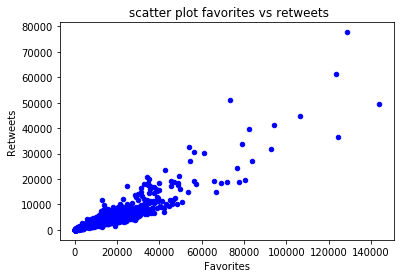

In [7]:
df_archive_master.plot(kind = 'scatter', x = 'favorites_count', y = 'retweets_count', color = 'blue')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title(' scatter plot favorites vs retweets')

In [10]:

import scipy as sp
sp.stats.pearsonr(df_archive_master['favorites_count'],df_archive_master['retweets_count'])
#np.corrcoef(df_archive_master['favorites_count'],df_archive_master['retweets_count'])

(0.91741365771294459, 0.0)

### From the above visual plot, it is very evident that if that Favorites count is high, then retweets count is also high - which can be understood.

(-1.1108353974197023,
 1.1221183568088211,
 -1.1155885425265684,
 1.1007423159131755)

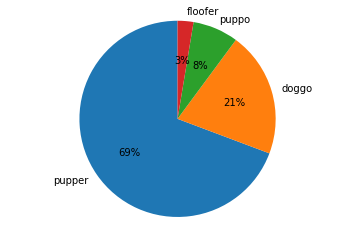

In [51]:
# To study the Dog stages distribution 

dog_stage_count = list(df_archive_master[df_archive_master['dog_stage_value'] != 'None']['dog_stage_value'].value_counts())[0:4]
dog_stage_label = df_archive_master[df_archive_master['dog_stage_value'] != 'None']['dog_stage_value'].value_counts().index.tolist()[0:4]
 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, labels = dog_stage_label,startangle = 90,autopct='%1.0f%%')
ax1.axis('equal')

### From the above visualization, it is very evident that pupper Dog stage has the highest percentage.

Text(0,0.5,'dog_breed')

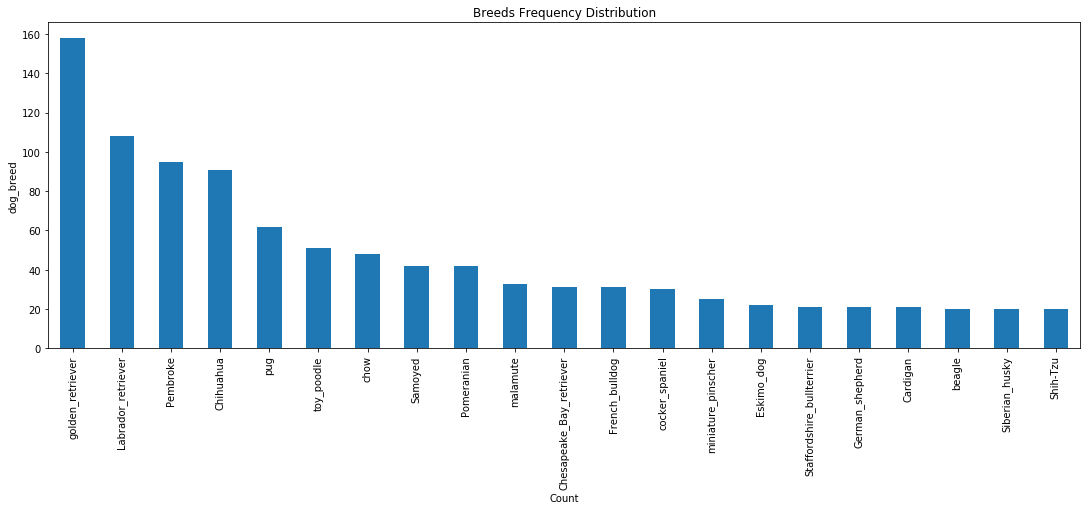

In [68]:
# To study the distribution of dog breed
df_breed_group_count = df_archive_master.groupby('Dog_breed_prediction').filter(lambda x: len(x) >= 20)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 6)
df_breed_group_count['Dog_breed_prediction'].value_counts().plot(kind = 'bar')
plt.title('Breeds Frequency Distribution')
plt.xlabel('Count')
plt.ylabel('dog_breed')

### From the above visualisation, it is very clear that Golden_Retriever seems to be the popular dog breed.